# Analysis of "The Market"

Typically whenever someone talks about beating "the market" they are talking about an index. The most common indices you may hear mentioned are the S&P500, NASDAQ, and the Dow Jones Industrial. These indices are a basket of stocks created upon different definitions. Those indices can be bought through exchange traded funds (ETFs) are known by their tickers "SPY", "QQQ", and "DIA". Since these are ETFs and not the true indices themselves they may differ slightly from the actual index they are mimicking. This analysis will focus on the SPY and DIA as they are more commonly know.

- SPY: The SPDR S&P 500 ETF is the largest ETF tracking the S&P 500. Coincidentally, as the name implies, the S&P500 is comprised of 500 companies. The index is constructed using a weighted average market capitalization, which means larger companies have a greater weighting in the index. 


- DIA: The Dow Jones Industrial Average is comprised of 30 companies selected by a committee of Wall Street Journal editors.The only selection "rule" is companies must be substantial enterprises that represent a significant portion of the economic activity in the U.S. The Dow Jones Industrial Average is the 2nd oldest index dating back to 1896. The Dow Jones is a price-weighted index, meaning its value is derived from the price per share for each stock divided by a common divisor.


## Load Data into Dataframes and modify

In [54]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from formulas import calculate_returns, compute_log_returns

In [55]:
# Read data in to dataframes
spy = pd.read_csv('etfs/SPY.csv')
dia = pd.read_csv('etfs/DIA.csv')

# Change date column to datetime type
spy['Date'] = pd.to_datetime(spy['Date'])
dia['Date'] = pd.to_datetime(dia['Date'])

# View amount of daily data
print(f'There are {spy.shape[0]} rows in SPY and {dia.shape[0]} DIA rows')
print('*'*100)
print(f'''The date range of SPY is {spy.Date.dt.year.min()} to {spy.Date.dt.year.max()} 
       \n DIA is {dia.Date.dt.year.min()} to {dia.Date.dt.year.max()}''')

There are 6843 rows in SPY and 5587 DIA rows
****************************************************************************************************
The date range of SPY is 1993 to 2020 
       
 DIA is 1998 to 2020


### Exclude 2020 Data
For this excersise, and probably this entire project, we will only be using data up until Dec 31, 2019. This will give us a good complete yearly picture since we are not yet done with 2020.

In [56]:
# Edit spy dataframe taking out all 2020 points
spy = spy.loc[spy.Date.dt.year < 2020]

# Edit dia dataframe taking out all 2020 points
dia = dia.loc[dia.Date.dt.year < 2020]

### Calculate Daily Return and Daily log Return

It is better to make predictions of returns versus stock price. This is because a 2% gain on a 100 dollar stock is not the same as a 2% gain on a 10 dollar stock. Stock returns are stationary in the fact that the magnitude is always in the same relative range. We will do a distribution plot further in the notebook.

In [57]:
# compute daily return
spy['percent_gain'] = calculate_returns(spy['Adj Close']) 
dia['percent_gain'] = calculate_returns(dia['Adj Close'])

# compute daily log return
spy['log_percent_gain'] = compute_log_returns(spy['Adj Close'])
dia['log_percent_gain'] = compute_log_returns(dia['Adj Close'])

# Drop first row as the newly calculated columns will be N/A due to no previous data
spy = spy.iloc[1:]
dia = dia.iloc[1:]

# Check out dataframe
spy.head()

,Date,Open,High,Low,Close,Adj Close,Volume,percent_gain,log_percent_gain
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,26.486324,480500,0.007112,0.007087
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.542448,201300,0.002119,0.002117
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,26.822998,529400,0.010570,0.010514
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,26.935240,531500,0.004185,0.004176
5,1993-02-05,44.96875,45.06250,44.71875,44.96875,26.916538,492100,-0.000694,-0.000695


### Let's look at some distributions

mean    0.000434
min    -0.098448
max     0.145198
var     0.000130
std     0.011421
Name: percent_gain, dtype: float64


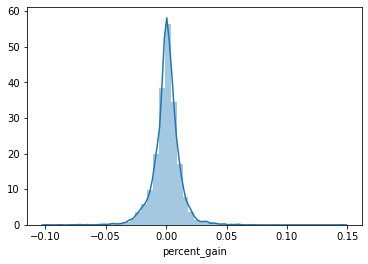

In [58]:
# print out daily return of the close adjusted price
sns.distplot(spy['percent_gain'])
print(spy['percent_gain'].agg(['mean','min','max','var', 'std']))

**DIA distribution**
- Normal-ish distribution. High Kurtosis we will measure. (normal distribution mean = 0 std = 1)
- Largest percent gain is 13.5% in one day
- Largest loss in a day is -9%
- Standard dev (volatility) is slightly larger than S&P500 probably due to less diversification


mean    0.000385
min    -0.093947
max     0.135560
var     0.000132
std     0.011468
Name: percent_gain, dtype: float64


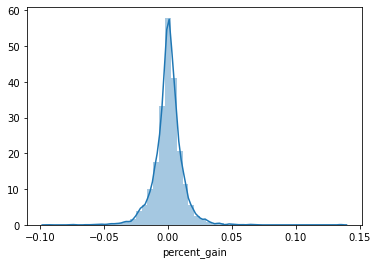

In [59]:
# show daily return
sns.distplot(dia['percent_gain'])
print(dia['percent_gain'].agg(['mean','min','max','var', 'std']))

In [60]:
spy['sma_3'] = spy.Close.rolling(window=3).mean()

In [61]:
spy.head()

,Date,Open,High,Low,Close,Adj Close,Volume,percent_gain,log_percent_gain,sma_3
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,26.486324,480500,0.007112,0.007087,NaN
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.542448,201300,0.002119,0.002117,NaN
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,26.822998,529400,0.010570,0.010514,44.468750
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,26.935240,531500,0.004185,0.004176,44.718750
5,1993-02-05,44.96875,45.06250,44.71875,44.96875,26.916538,492100,-0.000694,-0.000695,44.927083
